# Outliers

Para utilizar este código es necesario subir este archivo `ipynb` a la carpeta Colab Notebooks de Google Drive y abrir el archivo desde el navegador.

Emplazar el archivo de datos `Ejemplo_outliers.csv` en la carpeta sample_data (accesible en el desplegable de la izquierda de Google Colab, tras pulsar el icono de la carpeta)

También se puede ejecutar en local con un entorno python y la aplicación Jupyter Notebook.

## Apertura del csv de ejemplo

In [2]:
import os
import pandas as pd
os.chdir("/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

## Previsualización de los datos

In [3]:
print(data)

        G1     G2     G3     G4     G5     G6     G7     G8     G9
0    0.175  0.188 -0.159  0.095  0.374 -0.238 -0.800  0.158 -0.211
1    0.102  0.075  0.141  0.180  0.138 -0.057 -0.075  0.072  0.072
2    0.607  0.711  0.879  0.765  0.592  0.187  0.431  0.345  0.187
3    0.774  0.823  0.619  0.370  0.725  0.439 -0.025 -0.259  0.496
4    0.504  0.644  0.845  0.681  0.502  0.151  0.404  0.296  0.260
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
179  0.535  0.524  0.649  0.475  0.486  0.657  0.941  0.527  0.494
180  0.041  0.056  0.194  0.234 -0.003 -0.310  0.267 -0.449 -0.432
181  0.507  0.563  0.539  0.634  0.471  0.578  0.686  0.763  0.576
182 -0.033 -0.025  0.118  0.148 -0.076 -0.403 -0.345  0.084 -0.473
183  0.470  0.520  0.526  0.553  0.650  0.920  0.466  0.608  0.550

[184 rows x 9 columns]


In [4]:
data.head(n=10)

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259


Datos estadísticos

In [5]:
data.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
count,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000
mean,0.249245,0.293576,0.351696,0.316196,0.30250,0.143277,0.156185,0.304603,0.131821
std,0.720936,0.780485,0.727749,0.742577,0.73937,0.923092,0.822092,0.901041,0.819553
min,-1.171000,-1.186000,-0.975000,-1.186000,-1.09500,-1.252000,-1.470000,-1.283000,-1.416000
25%,-0.053000,-0.062000,0.047750,0.025000,-0.07100,-0.383500,-0.260250,-0.144250,-0.367000
50%,0.181000,0.235500,0.284000,0.288000,0.26600,0.068000,-0.015500,0.272000,0.009000
75%,0.491250,0.548000,0.588500,0.549750,0.54075,0.484000,0.501500,0.728000,0.496000
max,7.197000,8.060000,7.223000,7.589000,7.25800,8.310000,7.835000,8.931000,7.824000


Comprobamos que no hay valores perdidos.

In [6]:
data.isnull().sum()

G1    0
G2    0
G3    0
G4    0
G5    0
G6    0
G7    0
G8    0
G9    0
dtype: int64

## Boxplot
El primer paso es realizar un "box-plot" para visualizar si existen outliers y como se distribuyen.

Una de las opciones es analizar cada variable individualmente

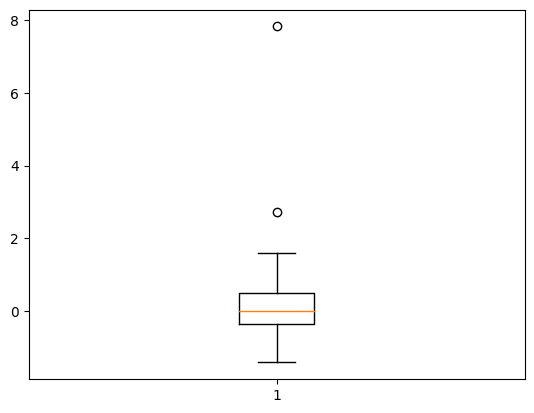

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# data1 = data.iloc[:,0]
data1 = data["G9"]

plt.boxplot(data1);

Tambien podemos realizar un grafico de todas las variables a la vez.

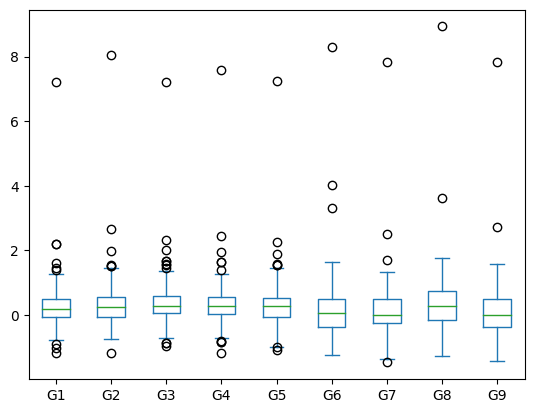

In [8]:
data.plot(kind = 'box');

El analisis grafico nos permite ver que existen outliers en todas las variables incluidas en el modelo.<br>
Una vez que hemos constatado que existen outliers, la primera opcion es eliminar las filas que contienen outliers en alguna de las variables.

In [9]:
import numpy as np
from scipy import stats
dataSinOut=data[(np.abs(stats.zscore(data)) <3).all(axis=1)]

Este código utiliza el criterio Z para identificar y eliminar outliers en un conjunto de datos.

1. `import numpy as np` y `from scipy import stats`: Importan las bibliotecas NumPy y SciPy. Estas bibliotecas proporcionan funcionalidades para manipulación de datos y operaciones estadísticas, respectivamente.

2. `dataSinOut = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]`:

   - `stats.zscore(data)`: Calcula los Z-scores para cada punto de datos en el conjunto de datos `data`. Un Z-score es una medida que indica la distancia desde la media al punto de datos medido en "número de veces la desviación típica".
   
   - `np.abs(...) < 3`: Compara cada Z-score calculado con el valor 3 en términos absolutos. Esto crea una matriz booleana donde `True` indica que el valor Z es menor que 3 y, por lo tanto, no se considera un outlier.
   
   - `.all(axis=1)`: Realiza una operación lógica "y" a lo largo del eje 1 (a lo largo de las filas) de la matriz booleana. Esto significa que todas las condiciones deben ser `True` a lo largo de una fila para que esa fila no sea considerada un outlier.

   - `data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]`: Filtra el conjunto de datos original (`data`) para incluir solo las filas que cumplen con la condición de que todos los Z-scores en esa fila son menores que 3 en valor absoluto. Por lo tanto, se eliminan las filas que contienen outliers según el criterio Z.

En resumen, este código crea un nuevo conjunto de datos (`dataSinOut`) que excluye las filas que contienen outliers según el criterio Z, donde un outlier se define como un punto de datos cuyo Z-score es mayor que 3 en valor absoluto en al menos una dimensión.

In [10]:
# Valor eliminado
data[(np.abs(stats.zscore(data)) > 3).all(axis=1)]

,G1,G2,G3,G4,G5,G6,G7,G8,G9
38,7.197,8.06,7.223,7.589,7.258,8.31,7.835,8.931,7.824


In [11]:
dataSinOut = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [12]:
print(dataSinOut)

        G1     G2     G3     G4     G5     G6     G7     G8     G9
0    0.175  0.188 -0.159  0.095  0.374 -0.238 -0.800  0.158 -0.211
1    0.102  0.075  0.141  0.180  0.138 -0.057 -0.075  0.072  0.072
2    0.607  0.711  0.879  0.765  0.592  0.187  0.431  0.345  0.187
3    0.774  0.823  0.619  0.370  0.725  0.439 -0.025 -0.259  0.496
4    0.504  0.644  0.845  0.681  0.502  0.151  0.404  0.296  0.260
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
179  0.535  0.524  0.649  0.475  0.486  0.657  0.941  0.527  0.494
180  0.041  0.056  0.194  0.234 -0.003 -0.310  0.267 -0.449 -0.432
181  0.507  0.563  0.539  0.634  0.471  0.578  0.686  0.763  0.576
182 -0.033 -0.025  0.118  0.148 -0.076 -0.403 -0.345  0.084 -0.473
183  0.470  0.520  0.526  0.553  0.650  0.920  0.466  0.608  0.550

[181 rows x 9 columns]


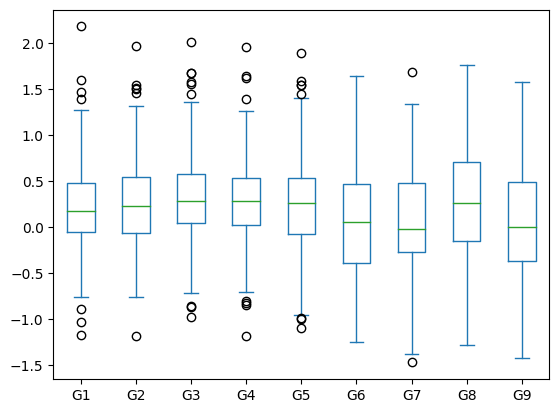

In [13]:
dataSinOut.plot(kind='box');

Volvemos a cargar el dataset

In [14]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

Otra forma de eliminar los datos en funcion del quantil es la siguiente.

---


En este caso habria que hacerlo para cada una de las variables.<br>
Este procedimiento puede ser interesante si estamos interesados en descartar algun tipo de evento concreto
que se halle focalizado en alguna de las variables.

In [15]:
qB = data["G1"].quantile(0.25)
qA = data["G1"].quantile(0.75)
print(qB, qA)

-0.053 0.49124999999999996


In [16]:
lim_max = 1.5 * (qA - qB) + qA
lim_min = qB - 1.5 * (qA - qB)

In [17]:
dataSinOut = data[(data["G1"] < lim_max) & (data["G1"] > lim_min)]

dataSinOut

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473


In [18]:
filas_borradas = data[(data["G1"] > lim_max) | (data["G1"] < lim_min)]
print(filas_borradas)

        G1     G2     G3     G4     G5     G6     G7     G8     G9
8    1.396  1.461  1.342  1.122  1.394  1.408  0.924  0.638  1.375
38   7.197  8.060  7.223  7.589  7.258  8.310  7.835  8.931  7.824
39   2.190  2.664  2.325  2.430  2.253  3.303  2.502  3.627  2.727
59  -0.892 -0.564 -0.975 -0.329 -0.999 -0.726 -1.374 -0.866 -1.298
65  -1.031 -0.493 -0.861 -0.846 -0.984 -0.097 -0.781  0.036 -0.677
102 -1.171 -1.186 -0.564 -1.186 -0.924 -1.095 -0.660 -1.203 -0.757
110  2.183  1.969  2.017  1.957  1.899  0.518  0.518  0.426  0.637
112  1.466  1.508  1.562  1.394  1.444  1.142  1.330  1.049  1.198
152  1.602  1.518  1.575  1.626  1.593  1.569  1.692  1.767  1.383


Volvemos a realizar el grafico.
Solo se han eliminado los outliers de la primera variable.
Sin embargo observamos que han desaparecido los outliers para la mayoria de las observaciones.

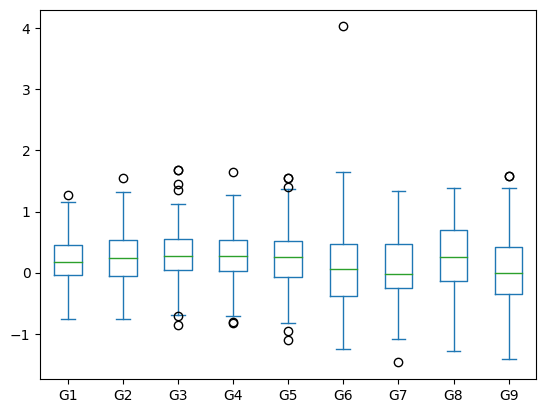

In [19]:
dataSinOut.plot(kind='box');

Esto nos lleva a plantearnos que los outliers se agrupan en las mismas observaciones.
A continuacion mostramos aquellas observaciones en las que se encuentran los outliers.
Para ello modificamos ligeramente el codigo anterior.

In [20]:
qB = data["G1"].quantile(0.05)
qA = data["G1"].quantile(0.95)
dataOut = data[(data["G1"] < qB) | (data["G1"] > qA)]
dataOut

,G1,G2,G3,G4,G5,G6,G7,G8,G9
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375
38,7.197,8.060,7.223,7.589,7.258,8.310,7.835,8.931,7.824
39,2.190,2.664,2.325,2.430,2.253,3.303,2.502,3.627,2.727
48,-0.677,-0.677,-0.595,-0.330,-0.278,-0.541,0.403,-0.870,0.049
54,-0.663,-0.695,-0.713,-0.805,-0.749,-0.976,-0.918,-1.168,-1.066
56,-0.762,-0.686,-0.863,-0.826,-0.824,-1.252,-1.470,-1.283,-0.992
57,-0.609,-0.753,-0.659,-0.624,-0.641,-0.983,-1.079,-0.817,-0.817
58,1.092,1.313,1.117,1.197,1.367,0.762,0.582,0.728,0.919
59,-0.892,-0.564,-0.975,-0.329,-0.999,-0.726,-1.374,-0.866,-1.298
61,1.275,1.549,1.359,1.266,1.403,1.174,0.927,0.992,0.834


En este caso observamos que tenemos muchos outliers.
Realmente estamos más interesados en saber qué ocurre con los valores verdaderamente extremos.
Por ello ajustamos más los porcentajes para seleccionar aquellos valores en los que estamos interesados.

In [21]:
qB = data["G1"].quantile(0.01)
qA = data["G1"].quantile(0.99)
data_excluidos = data[(data["G1"] < qB) | (data["G1"] > qA)]
data_excluidos

,G1,G2,G3,G4,G5,G6,G7,G8,G9
38,7.197,8.060,7.223,7.589,7.258,8.310,7.835,8.931,7.824
39,2.190,2.664,2.325,2.430,2.253,3.303,2.502,3.627,2.727
65,-1.031,-0.493,-0.861,-0.846,-0.984,-0.097,-0.781,0.036,-0.677
102,-1.171,-1.186,-0.564,-1.186,-0.924,-1.095,-0.660,-1.203,-0.757


Podemos observar que la observacion 38 agrupa valores muy extremos y que realmente resultan muy anomalos.<br>
Una observacion asi puede distorsionar un modelo. Por ello seria adecuado estudiar dicha variable por separado y excluirla del modelo.

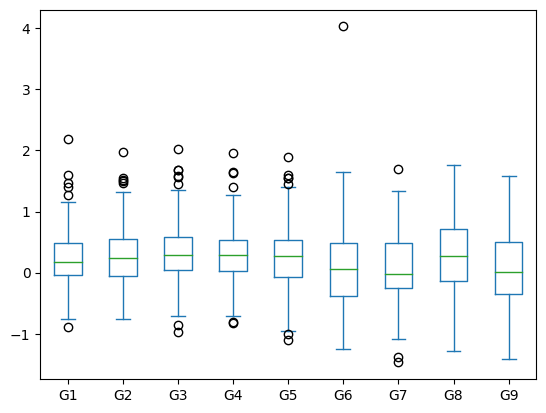

In [22]:
data_resultantes = data[~((data["G1"] < qB) | (data["G1"] > qA))]
data_resultantes.plot(kind='box');

Sin embargo en el grafico anterior observamos que en la variable "G6" sigue existiendo un outlier que no hemos recogido.<br>
De cara a entender bien nuestros datos es conveniente saber que ocurre con esa observacion.
Por ello repetimos el proceso.<br>

In [23]:
qB6 = data_resultantes["G6"].quantile(0.01)
qA6 = data_resultantes["G6"].quantile(0.99)
data_excluidos6 = data_resultantes[(data_resultantes["G6"] < qB6) | (data["G6"] > qA6)]
data_excluidos6

<ipython-input-23-837e15ecf092>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_excluidos6 = data_resultantes[(data_resultantes["G6"] < qB6) | (data["G6"] > qA6)]


,G1,G2,G3,G4,G5,G6,G7,G8,G9
56,-0.762,-0.686,-0.863,-0.826,-0.824,-1.252,-1.470,-1.283,-0.992
117,0.984,0.872,1.449,1.643,0.666,1.650,1.189,1.020,1.035
145,0.002,-0.083,0.300,-0.097,0.396,-1.225,0.331,0.368,0.150
154,-0.107,-0.093,0.065,0.114,-0.072,4.029,-0.055,-0.062,-0.454


En este analisis vemos que en la observacion que estamos tratando (la 154) el resto de las variables toman valores que podemos calificar como normales.

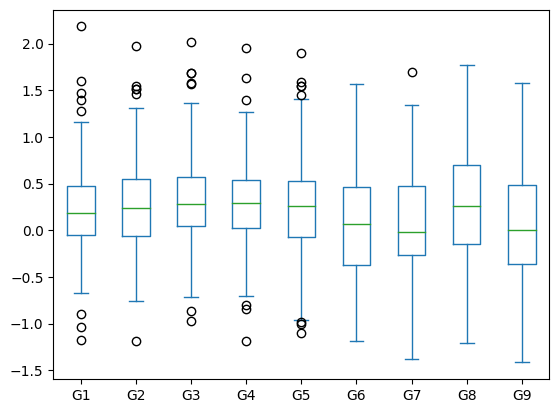

In [24]:
data_resultantes6 = data[~((data["G6"] < qB6) | (data["G6"] > qA6))]
data_resultantes6.plot(kind='box');

Volvemos a cargar los datos.

In [25]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

Tambien podemos utilizar la primera metodologia columna por columna.

In [26]:
from scipy import stats
data_sin_out = data[(np.abs(stats.zscore(data["G1"])) < 3)]

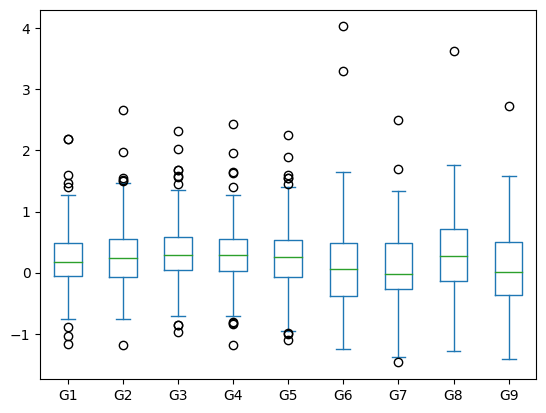

In [27]:
data_sin_out.plot(kind='box');

En estos tres procedimientos hemos visto diferentes formas de eliminar los valores extremos.

Existen otras muchas ocasiones en las que estos valores juegan un papel clave para el modelo.

De hecho en algunos casos son mas importantes los valores extremos que los valores "normales".

En estas ocasiones nos interesa crear una nueva variable que nos marque si una determinada observacion es un outlier o no.

Ademas en estos casos nos puede interesar diferenciar si se trata de un outlier "por arriba" o "por abajo".

Volvemos a cargar los datos.

In [28]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

Lo primero que tenemos que hacer es calcular los estadisticos basicos para la deteccion de outliers (media o mediana y desviacion tipica)

In [29]:
data.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
count,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000
mean,0.249245,0.293576,0.351696,0.316196,0.30250,0.143277,0.156185,0.304603,0.131821
std,0.720936,0.780485,0.727749,0.742577,0.73937,0.923092,0.822092,0.901041,0.819553
min,-1.171000,-1.186000,-0.975000,-1.186000,-1.09500,-1.252000,-1.470000,-1.283000,-1.416000
25%,-0.053000,-0.062000,0.047750,0.025000,-0.07100,-0.383500,-0.260250,-0.144250,-0.367000
50%,0.181000,0.235500,0.284000,0.288000,0.26600,0.068000,-0.015500,0.272000,0.009000
75%,0.491250,0.548000,0.588500,0.549750,0.54075,0.484000,0.501500,0.728000,0.496000
max,7.197000,8.060000,7.223000,7.589000,7.25800,8.310000,7.835000,8.931000,7.824000


De los pasos anteriores hemos descubierto que la fila 38 presenta unos valores muy anomalos.

Por ello la vamos a eliminar.

Una forma de eliminarla es hacerlo manualmente.

In [30]:
(np.abs(stats.zscore(data)) > 1).any(axis=1)

0       True
1      False
2      False
3      False
4      False
       ...  
179    False
180    False
181    False
182    False
183    False
Length: 184, dtype: bool

In [31]:
data["Outlier"] = (np.abs(stats.zscore(data)) > 1).any(axis=1)

In [32]:
data.head(40)


,G1,G2,G3,G4,G5,G6,G7,G8,G9,Outlier
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,True
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,False
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,False
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,False
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,False
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354,False
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801,False
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379,False
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375,True
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259,False


In [33]:
datos_outlier = data[data["Outlier"]]

In [34]:
datos_outlier

,G1,G2,G3,G4,G5,G6,G7,G8,G9,Outlier
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,True
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375,True
15,-0.148,-0.285,-0.137,-0.089,-0.188,-0.705,-1.029,0.007,-0.398,True
20,-0.558,-0.705,-0.526,-0.412,-0.753,-0.998,-0.270,0.598,-1.416,True
22,-0.444,-0.315,-0.461,-0.278,0.283,0.068,1.185,-0.246,-0.097,True
28,0.038,-0.120,0.039,0.090,0.007,-0.609,-0.753,0.312,-0.203,True
31,-0.084,-0.060,-0.089,-0.255,-0.203,-0.120,-0.203,-0.609,-0.461,True
38,7.197,8.060,7.223,7.589,7.258,8.310,7.835,8.931,7.824,True
39,2.190,2.664,2.325,2.430,2.253,3.303,2.502,3.627,2.727,True
40,0.392,0.818,0.438,0.478,0.470,1.198,0.370,1.230,0.820,True


In [35]:
data1=data.drop(data.index[38])
data1.head(n=40)

,G1,G2,G3,G4,G5,G6,G7,G8,G9,Outlier
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,True
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,False
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,False
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,False
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,False
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354,False
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801,False
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379,False
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375,True
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259,False


Esto es una opcion viable en el caso de que debamos eliminar pocas observaciones.

Otra opcion es seleccionar una de las variables, ver a partir de que valor queremos eliminar la observacion y hacerlo a mano.

Vuelvo a cargar los datos.

In [36]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

In [37]:
data2=data[(data["G1"] < 2)]
print(data2)
data2.head(n=40)

        G1     G2     G3     G4     G5     G6     G7     G8     G9
0    0.175  0.188 -0.159  0.095  0.374 -0.238 -0.800  0.158 -0.211
1    0.102  0.075  0.141  0.180  0.138 -0.057 -0.075  0.072  0.072
2    0.607  0.711  0.879  0.765  0.592  0.187  0.431  0.345  0.187
3    0.774  0.823  0.619  0.370  0.725  0.439 -0.025 -0.259  0.496
4    0.504  0.644  0.845  0.681  0.502  0.151  0.404  0.296  0.260
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
179  0.535  0.524  0.649  0.475  0.486  0.657  0.941  0.527  0.494
180  0.041  0.056  0.194  0.234 -0.003 -0.310  0.267 -0.449 -0.432
181  0.507  0.563  0.539  0.634  0.471  0.578  0.686  0.763  0.576
182 -0.033 -0.025  0.118  0.148 -0.076 -0.403 -0.345  0.084 -0.473
183  0.470  0.520  0.526  0.553  0.650  0.920  0.466  0.608  0.550

[181 rows x 9 columns]


,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259


In [38]:
data2.to_csv("data2.csv", index=False)

Otra opcion es eliminar aquellas observaciones que sobrepasen una desviacion prefijada.

Esto se puede aplicar sobre una de las variables o sobre todo el dataset.

Aplicarlo sobre una determinada variable nos exige ser cuidadosos a la hora de fijar el limite para no eliminar demasiadas observaciones.

Vuelvo a cargar los datos.

In [39]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

Para ello utilizamos una formula que ya hemos visto con anterioridad modificada.

Tras ello comprobamos que no hemos eliminado elementos que queriamos mantener y que hemos eliminado la fila 38.

In [40]:
from scipy import stats
data1=data[(np.abs(stats.zscore(data["G1"])) < 6)]

print(data1)
data1.head(n=40)

        G1     G2     G3     G4     G5     G6     G7     G8     G9
0    0.175  0.188 -0.159  0.095  0.374 -0.238 -0.800  0.158 -0.211
1    0.102  0.075  0.141  0.180  0.138 -0.057 -0.075  0.072  0.072
2    0.607  0.711  0.879  0.765  0.592  0.187  0.431  0.345  0.187
3    0.774  0.823  0.619  0.370  0.725  0.439 -0.025 -0.259  0.496
4    0.504  0.644  0.845  0.681  0.502  0.151  0.404  0.296  0.260
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
179  0.535  0.524  0.649  0.475  0.486  0.657  0.941  0.527  0.494
180  0.041  0.056  0.194  0.234 -0.003 -0.310  0.267 -0.449 -0.432
181  0.507  0.563  0.539  0.634  0.471  0.578  0.686  0.763  0.576
182 -0.033 -0.025  0.118  0.148 -0.076 -0.403 -0.345  0.084 -0.473
183  0.470  0.520  0.526  0.553  0.650  0.920  0.466  0.608  0.550

[183 rows x 9 columns]


,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259


Otra opcion en vez de eliminar la observacion es transformarlos NAs


Vuelvo a cargar los datos.

In [41]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Una forma de ver en cada variable en que observacion se encuentran los outliers.

Marca como outliers aquellas observaciones que difieran de la media mas de tres veces la desviacion tipica.


In [43]:
import numpy as np

def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

datos=data.apply(outliers_z_score)
datos

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,[38],"[38, 39]",[38],[38],[38],"[38, 39, 154]",[38],"[38, 39]","[38, 39]"


Otra forma de ver en cada variable en que observacion se encuentran los outliers.
En este caso nos basamos en la desviacion desde la mediana.


In [44]:
import numpy as np

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

datos=data.apply(outliers_modified_z_score)
datos

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,"[38, 39, 110, 152]","[38, 39, 110]","[38, 39, 110, 120, 121]","[38, 39, 102, 110]","[38, 39]","[38, 39, 154]","[38, 39]","[38, 39]","[38, 39]"


Una forma de ver en cada variable en que observacion se encuentran los outliers.

Se fundamenta en la diferencia para el percentil 25 y 75.


In [45]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

datos=data.apply(outliers_iqr)
datos

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,"[8, 38, 39, 59, 65, 102, 110, 112, 152]","[38, 39, 61, 102, 110, 112, 152]","[38, 39, 56, 59, 65, 110, 112, 117, 120, 121, ...","[38, 39, 54, 56, 65, 102, 110, 112, 117, 152]","[38, 39, 59, 64, 110, 120, 121, 152]","[38, 39, 154]","[38, 39, 56, 152]","[38, 39]","[38, 39]"


Para ello utilizamos una formula ya utilizada pero modificada, igual que antes.

Realizamos la comprobacion de antes

Mostramos la fila que nos interesa (un numero menos ya que se ha eliminado la fila 38)

In [46]:
from scipy import stats
import numpy as np
data1=data[(np.abs(stats.zscore(data)) < 6).all(axis=1)]

print(data1)
print("\nÚltimas 40 filas\n")
print(data1.tail(n=40))
print("\nFila154\n")
print(data1.iloc[153,:])

        G1     G2     G3     G4     G5     G6     G7     G8     G9
0    0.175  0.188 -0.159  0.095  0.374 -0.238 -0.800  0.158 -0.211
1    0.102  0.075  0.141  0.180  0.138 -0.057 -0.075  0.072  0.072
2    0.607  0.711  0.879  0.765  0.592  0.187  0.431  0.345  0.187
3    0.774  0.823  0.619  0.370  0.725  0.439 -0.025 -0.259  0.496
4    0.504  0.644  0.845  0.681  0.502  0.151  0.404  0.296  0.260
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
179  0.535  0.524  0.649  0.475  0.486  0.657  0.941  0.527  0.494
180  0.041  0.056  0.194  0.234 -0.003 -0.310  0.267 -0.449 -0.432
181  0.507  0.563  0.539  0.634  0.471  0.578  0.686  0.763  0.576
182 -0.033 -0.025  0.118  0.148 -0.076 -0.403 -0.345  0.084 -0.473
183  0.470  0.520  0.526  0.553  0.650  0.920  0.466  0.608  0.550

[183 rows x 9 columns]

Últimas 40 filas

        G1     G2     G3     G4     G5     G6     G7     G8     G9
144  0.283  0.530  0.283  0.267  0.399  0.167 -0.083  0.267 -0.165
145  0.002 -0.083  

Hasta ahora hamos visto como identificar los outliers de diferente maneras para eliminarlos, mediante diferentes metodos.

A continuacion mostramos como identificar los outliers y como sustituirlos.

Vuelvo a cargar los datos.

In [47]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

Mediante esta formula podemos sustituir los outliers por la media.

In [48]:
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = mean
    return group

datos=data.apply(replace)

data.head(n=40)

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175000,0.188000,-0.159000,0.095000,0.3740,-0.238000,-0.800000,0.158000,-0.211000
1,0.102000,0.075000,0.141000,0.180000,0.1380,-0.057000,-0.075000,0.072000,0.072000
2,0.607000,0.711000,0.879000,0.765000,0.5920,0.187000,0.431000,0.345000,0.187000
3,0.774000,0.823000,0.619000,0.370000,0.7250,0.439000,-0.025000,-0.259000,0.496000
4,0.504000,0.644000,0.845000,0.681000,0.5020,0.151000,0.404000,0.296000,0.260000
5,0.570000,0.729000,0.879000,0.624000,0.5880,0.204000,0.435000,-0.018000,0.354000
6,0.885000,0.932000,0.878000,0.662000,0.8390,0.917000,0.593000,0.252000,0.801000
7,-0.029000,0.065000,0.258000,0.078000,-0.0530,-0.456000,-0.153000,-0.356000,-0.379000
8,1.396000,1.461000,1.342000,1.122000,1.3940,1.408000,0.924000,0.638000,1.375000
9,0.389000,0.428000,0.332000,0.466000,0.3500,0.539000,-0.159000,-0.459000,0.259000


Vuelvo a cargar los datos.

In [49]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

De esta manera podemos convertir los outliers en NAs y luego tratarlos como NAs.

El trataiento de NAs lo hemos visto en el script anterior.

In [50]:
import numpy as np

def replace2(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = np.nan
    return group

datos=data.apply(replace2)

data.head(n=40)


,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
5,0.570,0.729,0.879,0.624,0.588,0.204,0.435,-0.018,0.354
6,0.885,0.932,0.878,0.662,0.839,0.917,0.593,0.252,0.801
7,-0.029,0.065,0.258,0.078,-0.053,-0.456,-0.153,-0.356,-0.379
8,1.396,1.461,1.342,1.122,1.394,1.408,0.924,0.638,1.375
9,0.389,0.428,0.332,0.466,0.350,0.539,-0.159,-0.459,0.259


In [51]:
(np.abs(stats.zscore(data)) > 3).any(axis=1)

data_corregidos = data[(np.abs(stats.zscore(data)) > 3).any(axis=1)]
data_corregidos["G1"] = (data["G1"]).mean()


In [52]:
data_corregidos

,G1,G2,G3,G4,G5,G6,G7,G8,G9


Volvemos a cargar los datos.

En este caso vamos a crear una variable outlier alto y otra bajo para cada variable original.

In [53]:
import os
import pandas as pd
os.chdir(r"/content/sample_data/")
data = pd.read_csv("Ejemplo_outliers.csv")

Calculamos el valor que nos interesa.
Creamos las nuevas columnas.

In [54]:
q1B = data["G1"].quantile(0.15)
q1A = data["G1"].quantile(0.85)

data2.loc[:,"out1bajo"] = 0
data2.loc[data1["G1"]<q1B,"out1bajo"]=1

data2.loc[:,"out1alto"] = 0
data2.loc[data1["G1"]>q1A,"out1alto"]=1

data2

,G1,G2,G3,G4,G5,G6,G7,G8,G9,out1bajo,out1alto
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,0,0
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,0,0
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,0,0
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,0,1
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,0,0
...,...,...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494,0,0
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432,0,0
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576,0,0
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473,0,0


Repetimos esta misma operacion para la segunda variable.

In [55]:
q2B = data["G2"].quantile(0.15)
q2A = data["G2"].quantile(0.85)

data2.loc[:,"out2bajo"]=0
data2.loc[data1["G2"]<q1B,"out1bajo"]=1

data2.loc[:,"out2alto"]=0
data2.loc[data1["G2"]>q1A,"out2alto"]=1

data2

,G1,G2,G3,G4,G5,G6,G7,G8,G9,out1bajo,out1alto,out2bajo,out2alto
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,0,0,0,0
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,0,0,0,0
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,0,0,0,1
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,0,1,0,1
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494,0,0,0,0
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432,0,0,0,0
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576,0,0,0,0
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473,0,0,0,0


De esta forma vemos si debido a los valores extremos se produce un "salto" en el valor.
Tambien puede ocurrir que en estos valores se produzca un cambio en la pendiente.
Para incluir esto hay que incluir una variable multiplicativa.

In [56]:
data2["out1bajomulti"]=data2["G1"]*data2["out1bajo"]
data2["out1altomulti"]=data2["G1"]*data2["out1alto"]

data2["out2bajomulti"]=data2["G2"]*data2["out2bajo"]
data2["out2altomulti"]=data2["G2"]*data2["out2alto"]

data2

,G1,G2,G3,G4,G5,G6,G7,G8,G9,out1bajo,out1alto,out2bajo,out2alto,out1bajomulti,out1altomulti,out2bajomulti,out2altomulti
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,0,0,0,0,0.0,0.000,0.0,0.000
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,0,0,0,0,0.0,0.000,0.0,0.000
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,0,0,0,1,0.0,0.000,0.0,0.711
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,0,1,0,1,0.0,0.774,0.0,0.823
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,0,0,0,0,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494,0,0,0,0,0.0,0.000,0.0,0.000
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432,0,0,0,0,0.0,0.000,0.0,0.000
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576,0,0,0,0,0.0,0.000,0.0,0.000
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473,0,0,0,0,-0.0,-0.000,-0.0,-0.000
